# Classification of Images using Tensorflow



# Import the necessary Librariries


In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.metrics import classification_report
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

import tensorflow as tf
from tqdm import tqdm
import cv2

You will also declare variables that contain the class names and the corresponding label and define the desired IMAGE_SIZE for our pictures. You must define the labels corresponding to the various classes in the dataset.

In [2]:
Class_name=["cat","Cheetah","dog","lion","tiger"]
class_name_labels={classes: i for i, classes in enumerate(Class_name)}

nb_classes=len(Class_name)
print(class_name_labels)
IMAGE_SIZE=(150,150)

{'cat': 0, 'Cheetah': 1, 'dog': 2, 'lion': 3, 'tiger': 4}


Now, load our data. You will define a function called load_data which you can use to load your train and test data. 

You have two folders within the data folder, the seg_train folder, and seg_test folder.
Within each of these folders, you also have a folder containing images from each class. 
You will read individual images from each folder and push them into your image array after converting them to RPG form and resizing.
You will append a label to this image and append it to the output array.

In [3]:
def load_data():
    DIRECTORY=r"C:/Users/DELL/Desktop/Image classifer"
    CATEGORY=["seg_train","seg_test"]
    
    output=[]
    
    for category in CATEGORY:
        path = os.path.join(DIRECTORY, category)
        images=[]
        labels=[]
        print("loading {}".format(category))
        
        for folder in os.listdir(path):
            label=class_name_labels[folder]
            
            #iterate through each image in our floder
            for file in os.listdir(os.path.join(path, folder)):
                
                #get the path name of the image
                img_path=os.path.join(os.path.join(path, folder),file)
                # open and resize the image
                image=cv2.imread(img_path)
                image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
                image=cv2.resize(image,IMAGE_SIZE)
                
                # append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
        images=np.array(images, dtype ='float32')
        labels=np.array(labels, dtype ='int32')
            
        output.append((images,labels))
    return output
                
        

In [4]:
(train_images,train_labels),(test_images, test_labels)=load_data()

loading seg_train
loading seg_test


In [5]:
train_images,train_labels=shuffle(train_images,train_labels,random_state=25)

# creating a CNN

In [6]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation ='relu',input_shape = (150,150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation ='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(6,activation=tf.nn.softmax),
])

In [7]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
history= model.fit(train_images, train_labels, batch_size=120, epochs=6,validation_split=0.2)

Epoch 1/6
1/1 [==============================] - 67s 67s/step - loss: 52.7279 - accuracy: 0.0250 - val_loss: 1004.4982 - val_accuracy: 0.1500
Epoch 2/6
1/1 [==============================] - 3s 3s/step - loss: 1000.4711 - accuracy: 0.2125 - val_loss: 679.7263 - val_accuracy: 0.2000
Epoch 3/6
1/1 [==============================] - 3s 3s/step - loss: 726.7217 - accuracy: 0.2000 - val_loss: 389.8384 - val_accuracy: 0.2500
Epoch 4/6
1/1 [==============================] - 2s 2s/step - loss: 448.1183 - accuracy: 0.1875 - val_loss: 216.6927 - val_accuracy: 0.2000
Epoch 5/6
1/1 [==============================] - 2s 2s/step - loss: 242.5896 - accuracy: 0.2250 - val_loss: 243.6280 - val_accuracy: 0.2000
Epoch 6/6
1/1 [==============================] - 2s 2s/step - loss: 254.9583 - accuracy: 0.2125 - val_loss: 155.6018 - val_accuracy: 0.2000


In [9]:
def plot_accuracy_loss(history):
    fig=plt.figure(figsize=(10,5))
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--')
    plt.plot(history.history['val_accuracy'],'ro--')
    plt.title("train_acc vs val_acc")
    plt.ylabel('accuracy')
    plt.xlabel("epochs")
   
    
    
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--')
    plt.plot(history.history['val_loss'],'ro--')
    plt.title("train_loss vs val_loss")
    plt.ylabel('loss')
    plt.xlabel("epochs")
    
    plt.show()

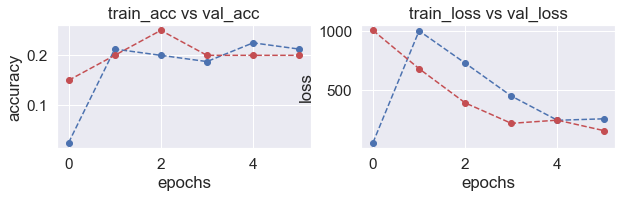

In [10]:
plot_accuracy_loss(history)

In [11]:
test_loss=model.evaluate(test_images,test_labels)

4/4 [==============================] - 1s 159ms/step - loss: 153.5699 - accuracy: 0.2100


In [12]:
predictions=model.predict(test_images)
pred_labels=np.argmax(predictions,axis=1)

In [13]:
print(classification_report(test_labels,pred_labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.20      1.00      0.34        20
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        20
           4       1.00      0.05      0.10        20

    accuracy                           0.21       100
   macro avg       0.24      0.21      0.09       100
weighted avg       0.24      0.21      0.09       100



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
